In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import random
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [4]:
# Make sure that following files are there in corresponding path as mentioned
ratings=pd.read_csv("../Dataset/ratings.csv")
org_movies=pd.read_csv("../Dataset/movies.csv")
tmdb=pd.read_csv("../Dataset/TMDB data.csv")
imdb=pd.read_csv("../Dataset/IMDB data.csv")
imdb

,movieId,imdbId,tmdbId,Ratings,Popularity,User Reviews,Critic Reviews,Metascore
0,1,114709,862.0,8.3,787.0,789.0,170.0,96.0
1,2,113497,8844.0,7.1,568.0,333.0,78.0,39.0
2,3,113228,15602.0,6.6,NaN,71.0,26.0,46.0
3,4,114885,31357.0,6.0,NaN,65.0,19.0,NaN
4,5,113041,11862.0,6.1,NaN,83.0,33.0,49.0
...,...,...,...,...,...,...,...,...
9737,193581,5476944,432131.0,7.6,NaN,10.0,5.0,NaN
9738,193583,5914996,445030.0,7.3,NaN,29.0,5.0,NaN
9739,193585,6397426,479308.0,6.2,NaN,4.0,8.0,NaN
9740,193587,8391976,483455.0,7.3,NaN,14.0,3.0,NaN


In [ ]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [ ]:
org_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
tmdb

,movieId,imdbId,tmdbId,user_score,language,budget,revenue
0,1,114709,862.0,80.0,English,30000000.0,394400000.0
1,2,113497,8844.0,72.0,English,65000000.0,262821940.0
2,3,113228,15602.0,65.0,English,25000000.0,71500000.0
3,4,114885,31357.0,63.0,English,16000000.0,81452156.0
4,5,113041,11862.0,63.0,English,NaN,76594107.0
...,...,...,...,...,...,...,...
9737,193581,5476944,432131.0,77.0,Japanese,NaN,NaN
9738,193583,5914996,445030.0,78.0,Japanese,NaN,6000000.0
9739,193585,6397426,479308.0,68.0,English,NaN,NaN
9740,193587,8391976,483455.0,82.0,Japanese,NaN,NaN


In [ ]:
imdb

,movieId,imdbId,tmdbId,Ratings,Popularity,User Reviews,Critic Reviews,Metascore
0,1,114709,862.0,8.3,787.0,789.0,170.0,96.0
1,2,113497,8844.0,7.1,568.0,333.0,78.0,39.0
2,3,113228,15602.0,6.6,NaN,71.0,26.0,46.0
3,4,114885,31357.0,6.0,NaN,65.0,19.0,NaN
4,5,113041,11862.0,6.1,NaN,83.0,33.0,49.0
...,...,...,...,...,...,...,...,...
9737,193581,5476944,432131.0,7.6,NaN,10.0,5.0,NaN
9738,193583,5914996,445030.0,7.3,NaN,29.0,5.0,NaN
9739,193585,6397426,479308.0,6.2,NaN,4.0,8.0,NaN
9740,193587,8391976,483455.0,7.3,NaN,14.0,3.0,NaN


# Handling Missing Values

In [ ]:
# Number of cells in each columns of ratings which are either null or Nan.
ratings.isnull().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0


In [ ]:
org_movies.isnull().sum()

,0
movieId,0
title,0
genres,0


In [ ]:
tmdb.isnull().sum()

,0
movieId,0
imdbId,0
tmdbId,8
user_score,152
language,149
budget,3709
revenue,3251


In [ ]:
imdb.isnull().sum()

,0
movieId,0
imdbId,0
tmdbId,8
Ratings,13
Popularity,6631
User Reviews,65
Critic Reviews,175
Metascore,2799


In [6]:
# Drop unncessary columns and drop budget and revenue due to major part of missing values
tmdb=tmdb.drop(["tmdbId","imdbId","budget","revenue"],axis=1)

# Filling User_score column with average score in case of null
average_user_score=tmdb['user_score'].mean()
tmdb.fillna({'user_score':average_user_score}, inplace=True)

# Fillinf language column with English in case of missing value
tmdb.fillna({'language':'English'}, inplace=True)
tmdb.isnull().sum()


,0
movieId,0
user_score,0
language,0


In [5]:
# Drop unnecessary columns and drop popularity and metascore due to major part of missing values
imdb=imdb.drop(["imdbId","tmdbId","Popularity","Metascore"],axis=1)

# Filling Missing Values in column with average value when it is null
imdb.fillna({'User Reviews':imdb['User Reviews'].mean()}, inplace=True)
imdb.fillna({'Critic Reviews':imdb['Critic Reviews'].mean()}, inplace=True)
imdb.fillna({'Ratings':imdb['Ratings'].mean()}, inplace=True)
imdb.isnull().sum()


,0
movieId,0
Ratings,0
User Reviews,0
Critic Reviews,0


# Dataset Modification

In [7]:
# Split genres and create new columns
genres= ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
         'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', '(no genres listed)']

movies=org_movies.copy()
for genre in genres:
    movies[genre]=movies['genres'].apply(lambda x:1 if genre in x.split('|') else 0)

movies.drop(columns=['genres'], inplace=True)
movies


,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,(no genres listed)
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9738,193583,No Game No Life: Zero (2017),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9739,193585,Flint (2017),0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Merge the DataFrames on `movieId`
merged_tmdb= pd.merge(movies, tmdb, on='movieId', how='inner')
merged_df= pd.merge(merged_tmdb, imdb, on='movieId', how='inner')
final_df= ratings.merge(merged_df, on='movieId', how='left')
final_df

,userId,movieId,rating,timestamp,title,Action,Adventure,Animation,Children,Comedy,...,Sci-Fi,Thriller,War,Western,(no genres listed),user_score,language,Ratings,User Reviews,Critic Reviews
0,1,1,4.0,964982703,Toy Story (1995),0,1,1,1,1,...,0,0,0,0,0,80.0,English,8.3,789.0,170.0
1,1,3,4.0,964981247,Grumpier Old Men (1995),0,0,0,0,1,...,0,0,0,0,0,65.0,English,6.6,71.0,26.0
2,1,6,4.0,964982224,Heat (1995),1,0,0,0,0,...,0,1,0,0,0,79.0,English,8.3,1300.0,205.0
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),0,0,0,0,0,...,0,1,0,0,0,84.0,English,8.6,1900.0,162.0
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",0,0,0,0,0,...,0,1,0,0,0,82.0,English,8.5,1500.0,147.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),0,0,0,0,0,...,0,1,0,0,0,73.0,English,7.3,1100.0,573.0
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),1,0,0,0,0,...,0,1,0,0,0,73.0,English,7.4,1000.0,500.0
100833,610,168250,5.0,1494273047,Get Out (2017),0,0,0,0,0,...,0,0,0,0,0,76.0,English,7.8,2000.0,441.0
100834,610,168252,5.0,1493846352,Logan (2017),1,0,0,0,0,...,1,0,0,0,0,78.0,English,8.1,1700.0,650.0


# Exploratory Data Analysis

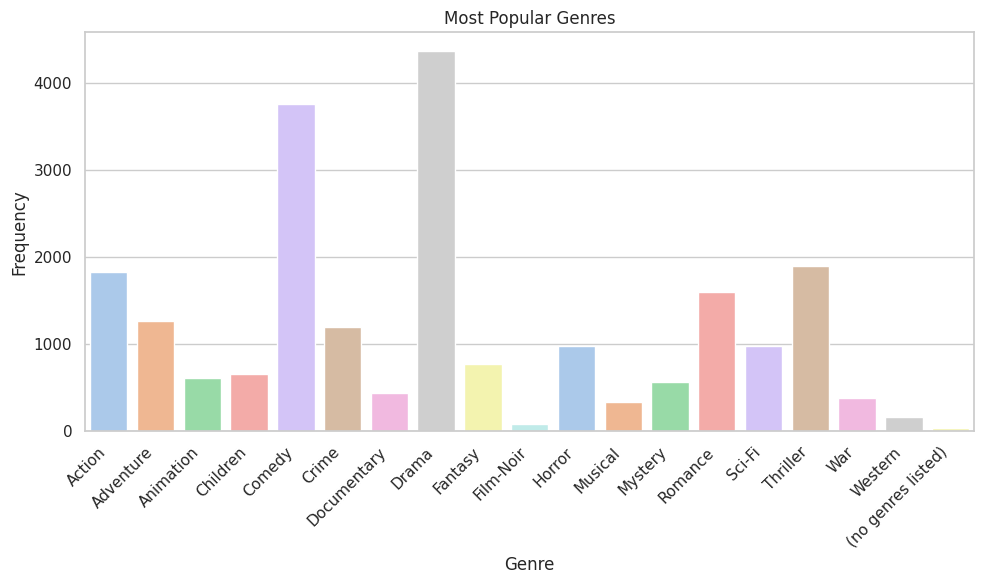

In [9]:
# Store the frequency of each genre in dictionary
dict = {}
for genre in genres:
    dict[genre] = merged_df[genre].sum()

genres1 = pd.DataFrame(list(dict.items()), columns=['Genre', 'Frequency'])

# Plot the graph for Frequency V/S Genre
sns.set_theme(style="whitegrid")
palette = sns.color_palette("pastel", n_colors=len(genres1))
plt.figure(figsize=(10, 6))
sns.barplot(x='Genre', y='Frequency', data=genres1, palette=palette, hue='Genre')
plt.title('Most Popular Genres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

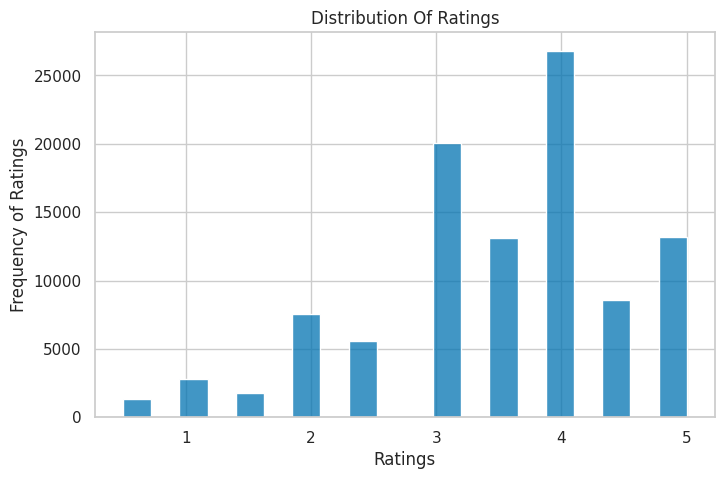

In [10]:
# Plotting Distribution of Ratings
sns.set_theme(style="whitegrid")
palette=sns.color_palette('colorblind')
plt.figure(figsize=(8,5))
sns.histplot(ratings['rating'], bins=20, kde=False, color=palette[0])
plt.xlabel('Ratings')
plt.ylabel('Frequency of Ratings')
plt.xticks()
plt.title('Distribution Of Ratings')
plt.show()

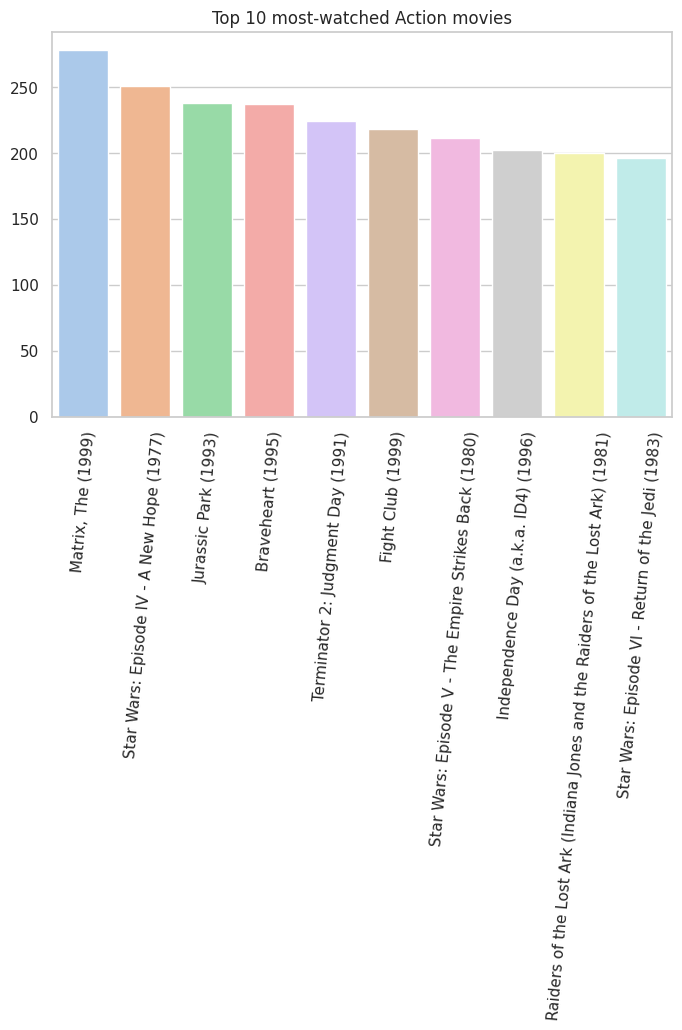

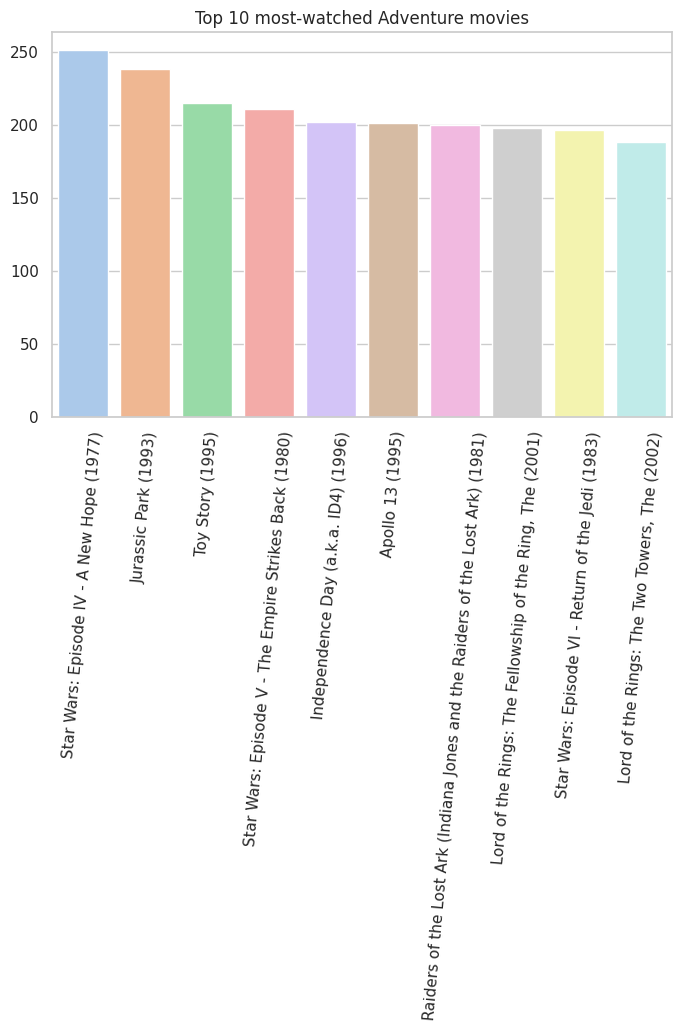

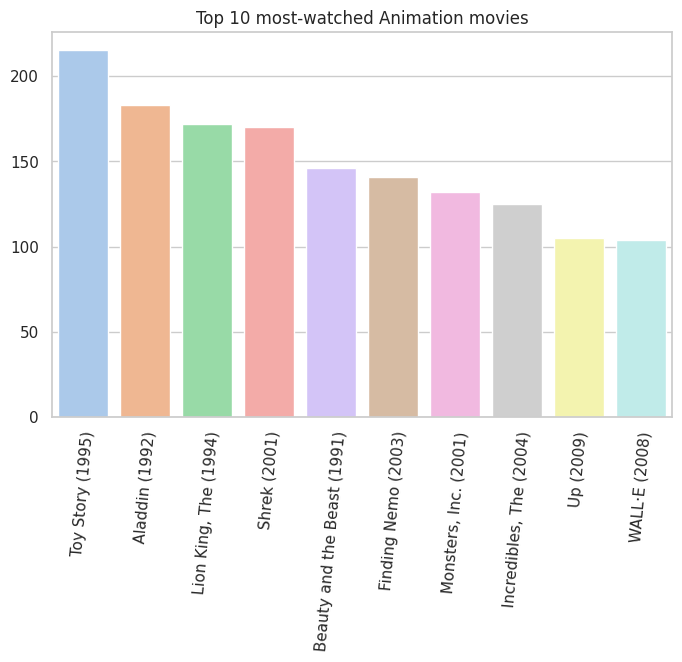

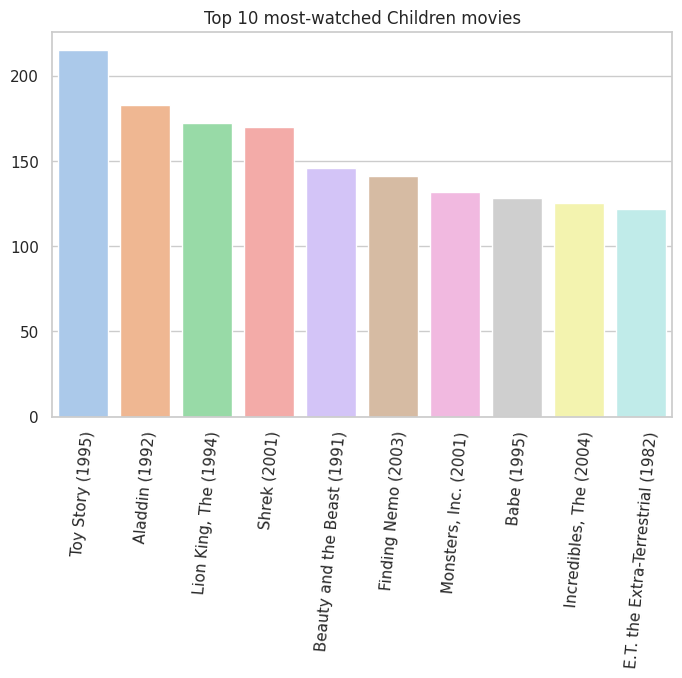

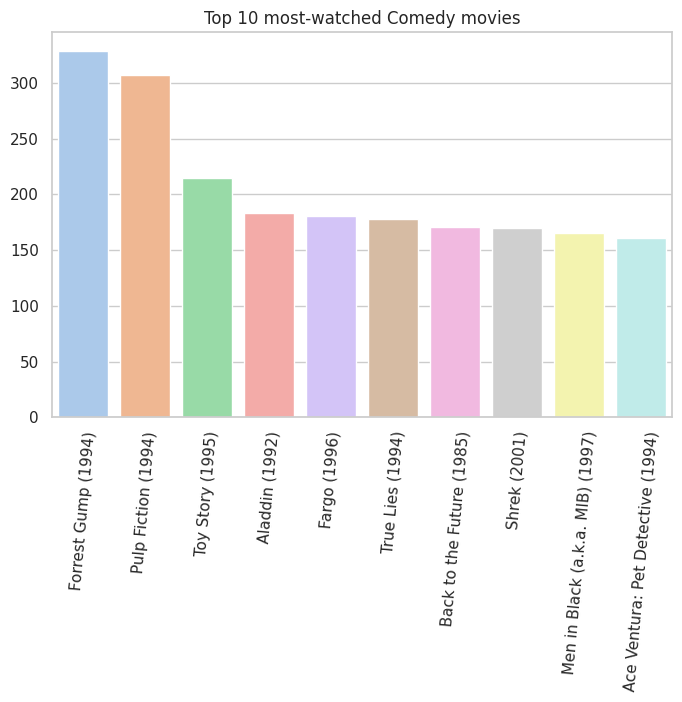

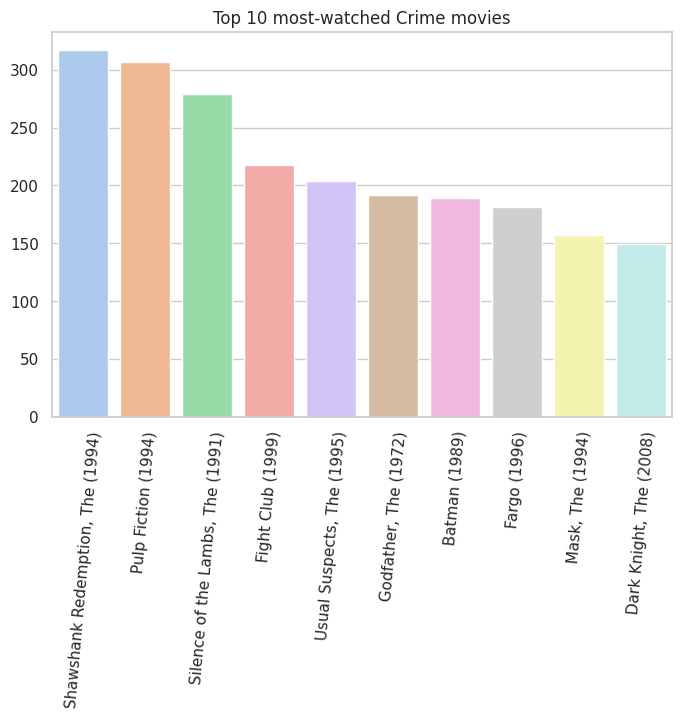

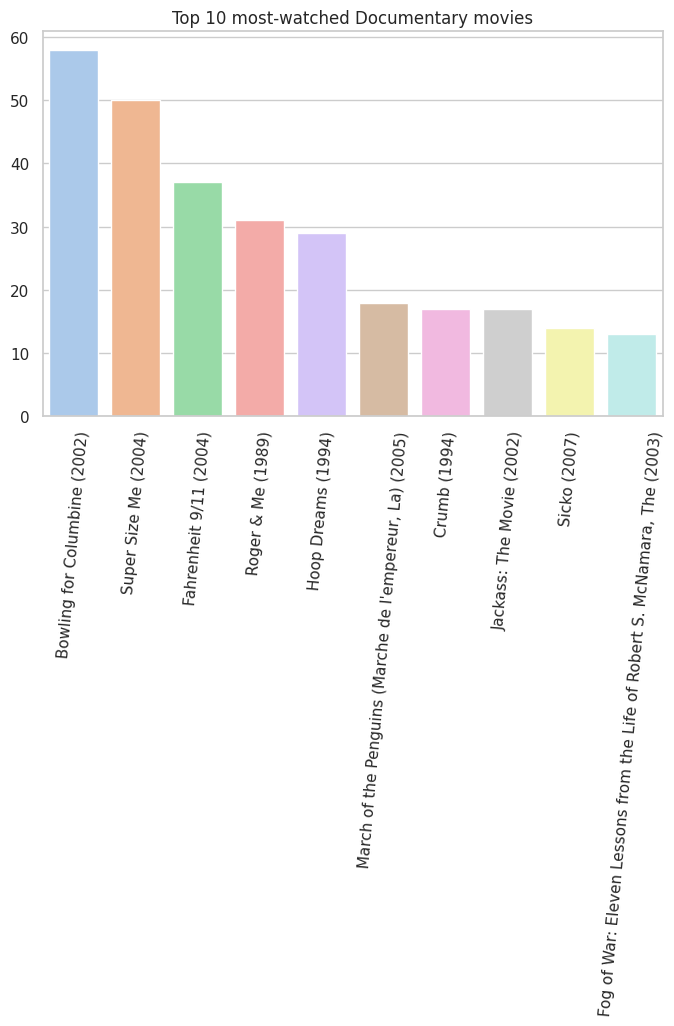

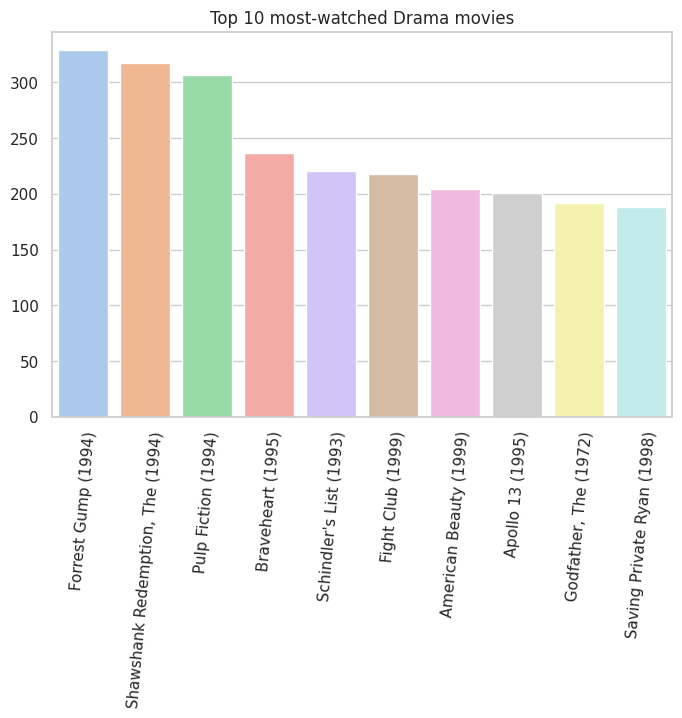

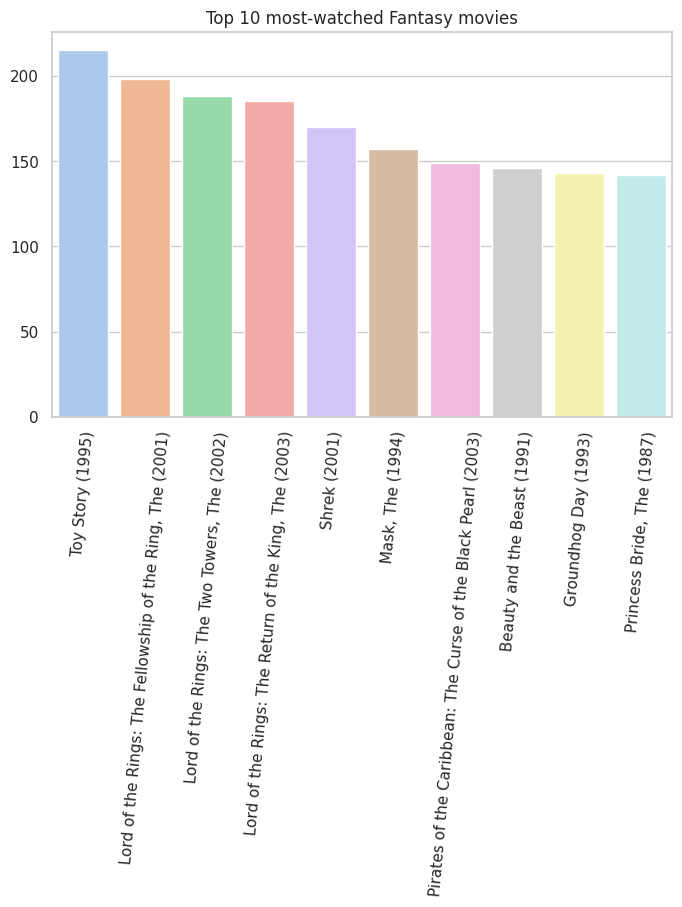

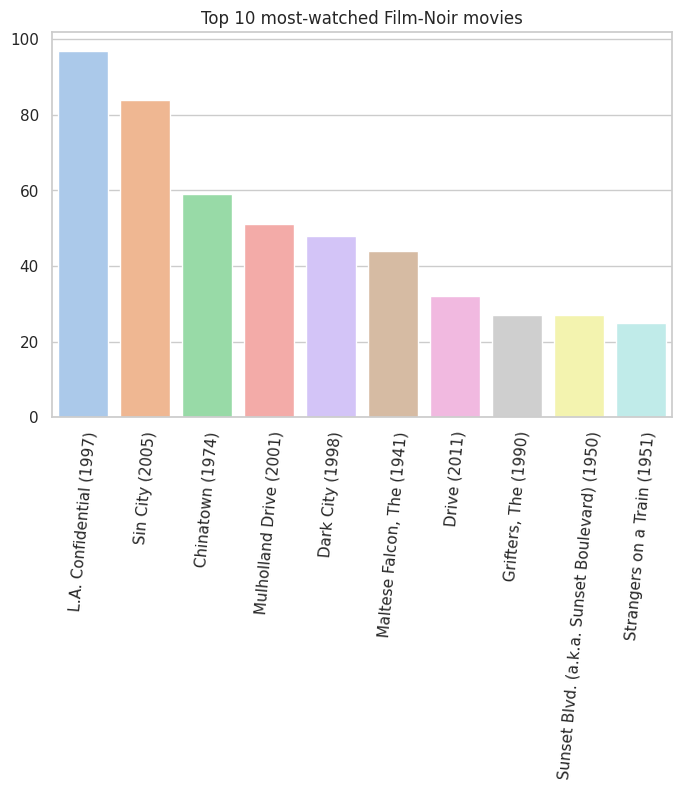

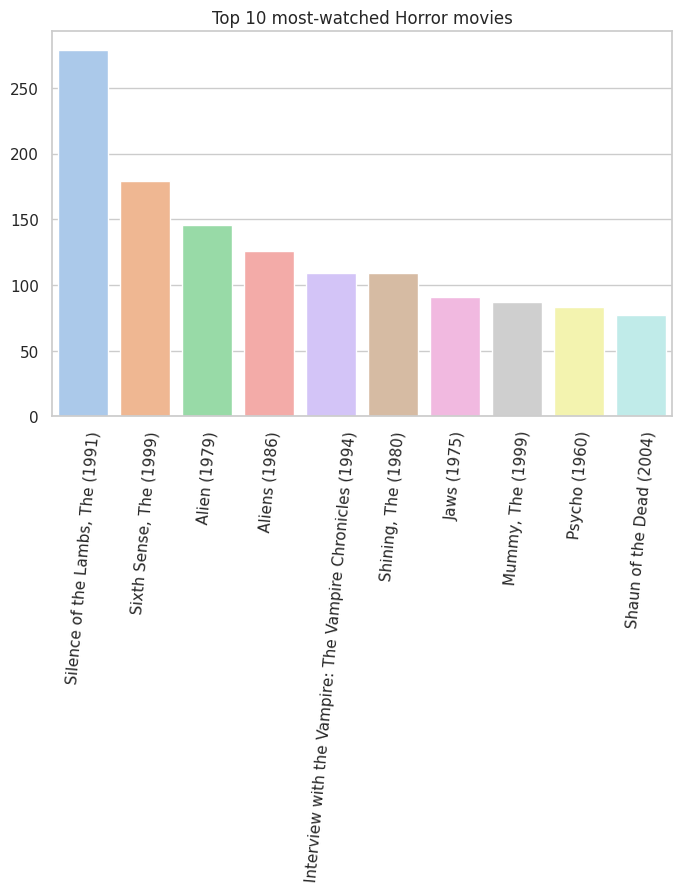

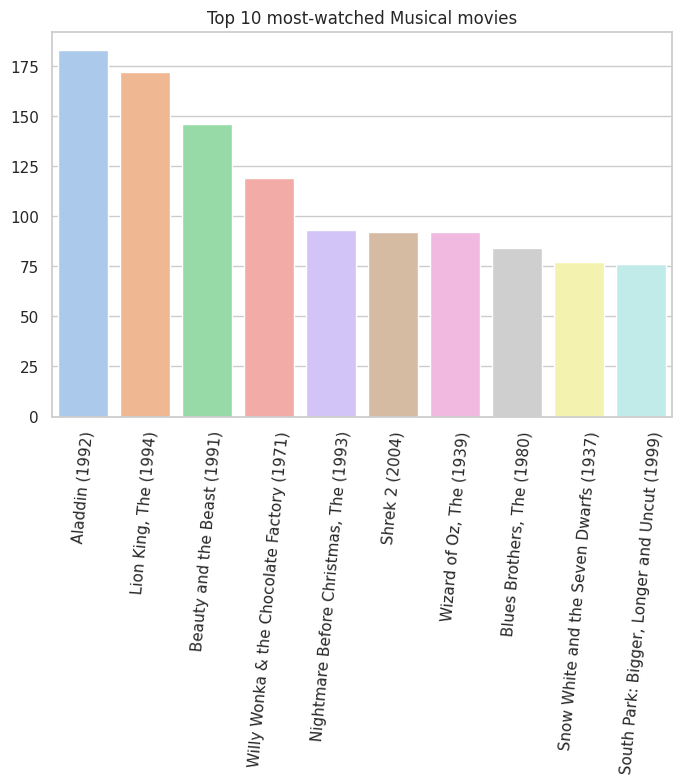

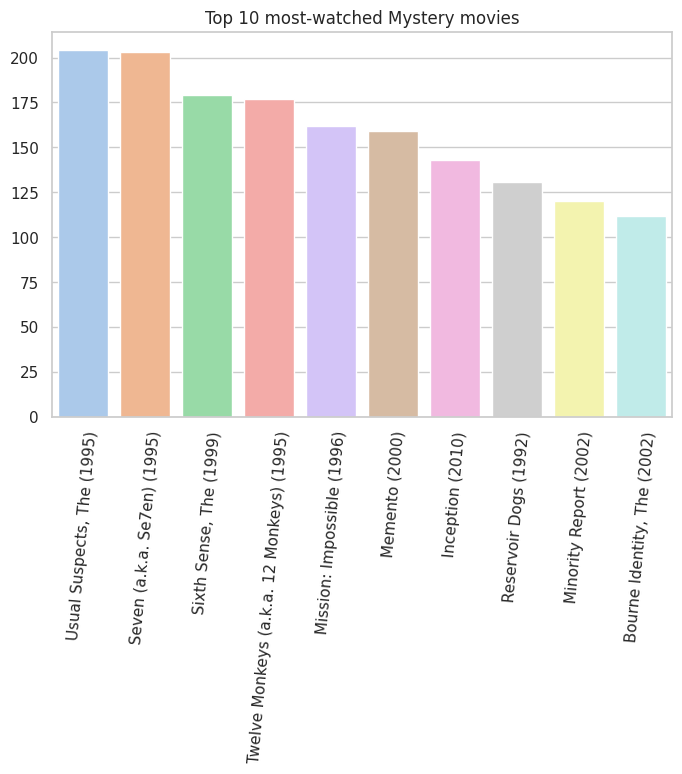

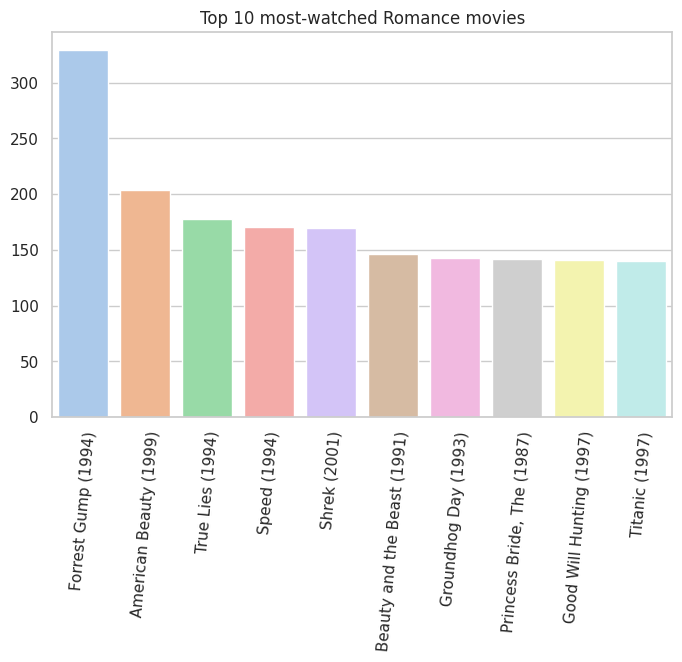

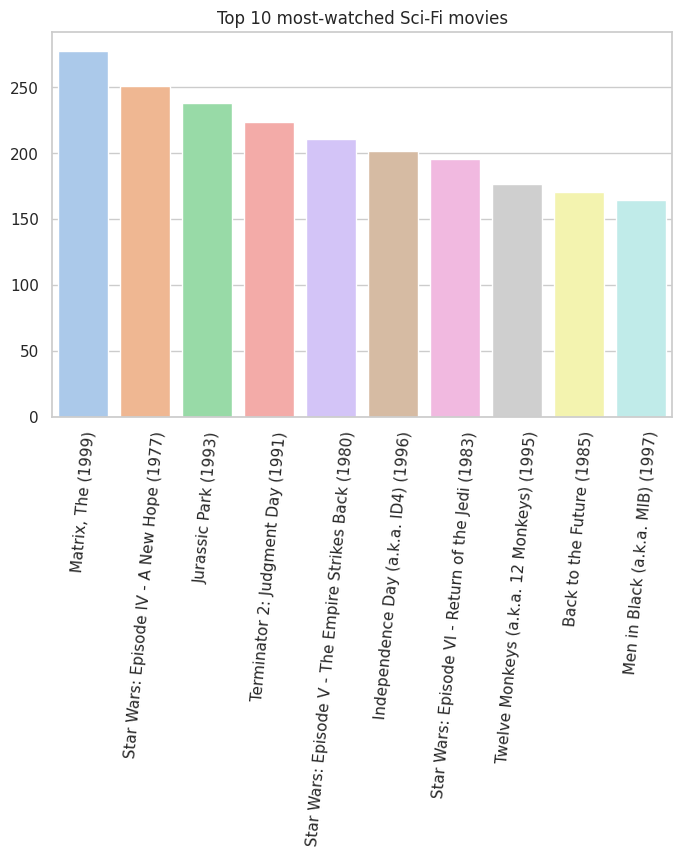

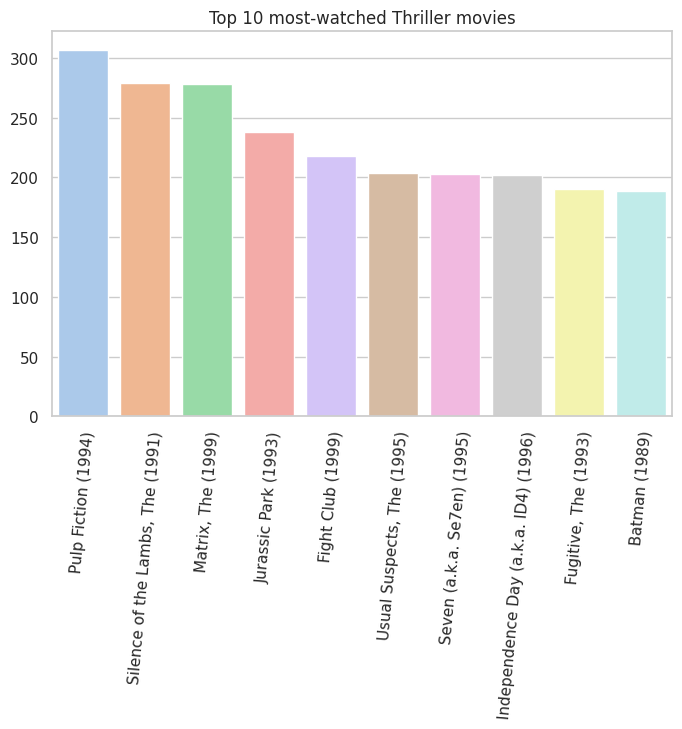

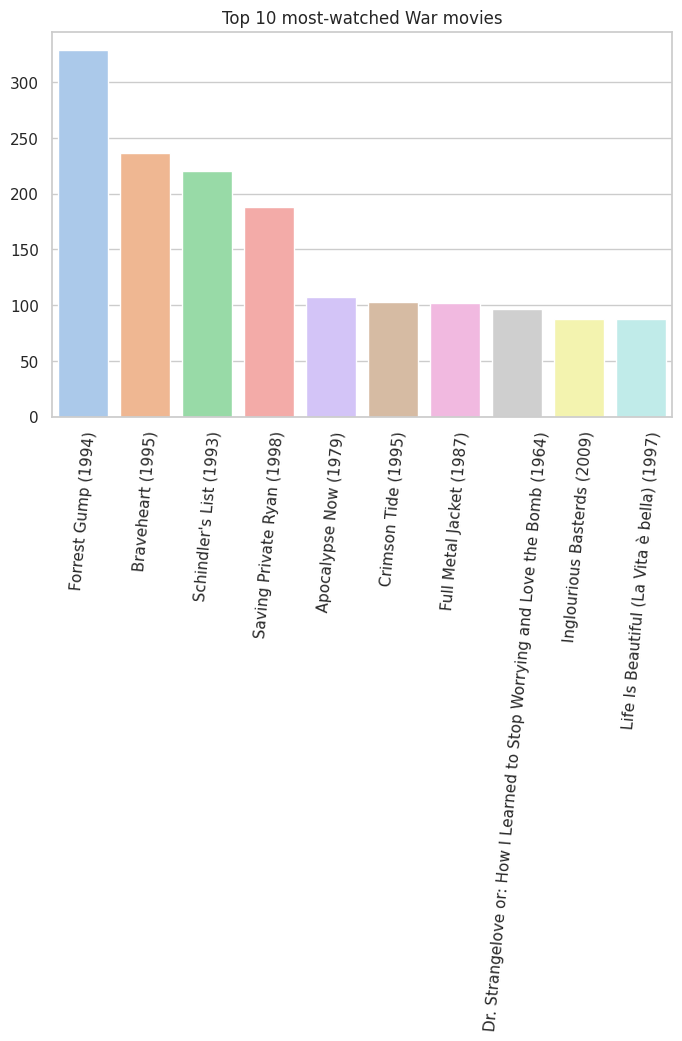

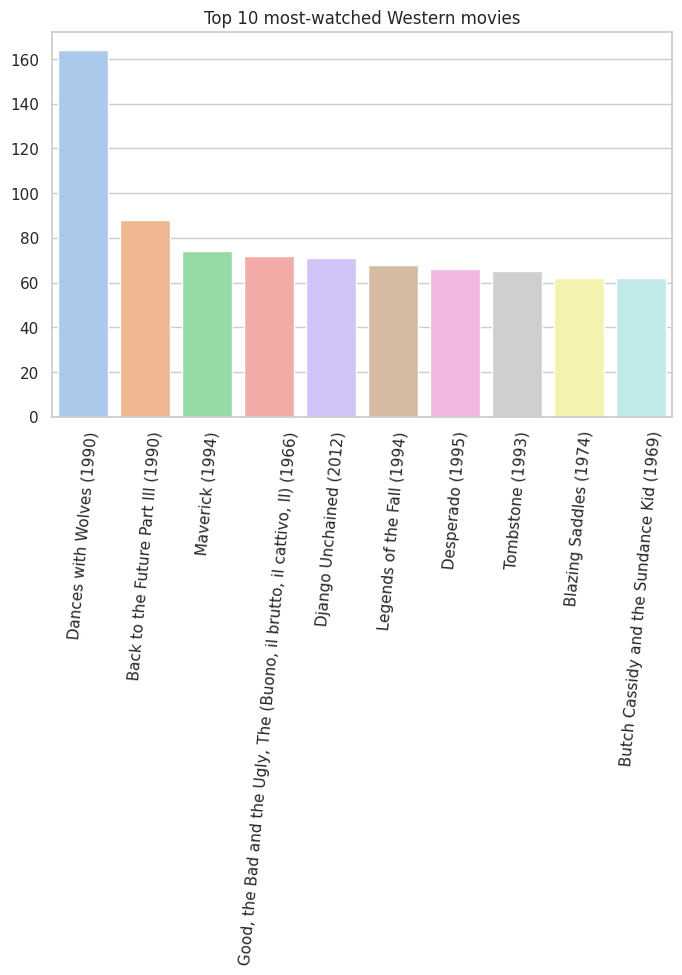

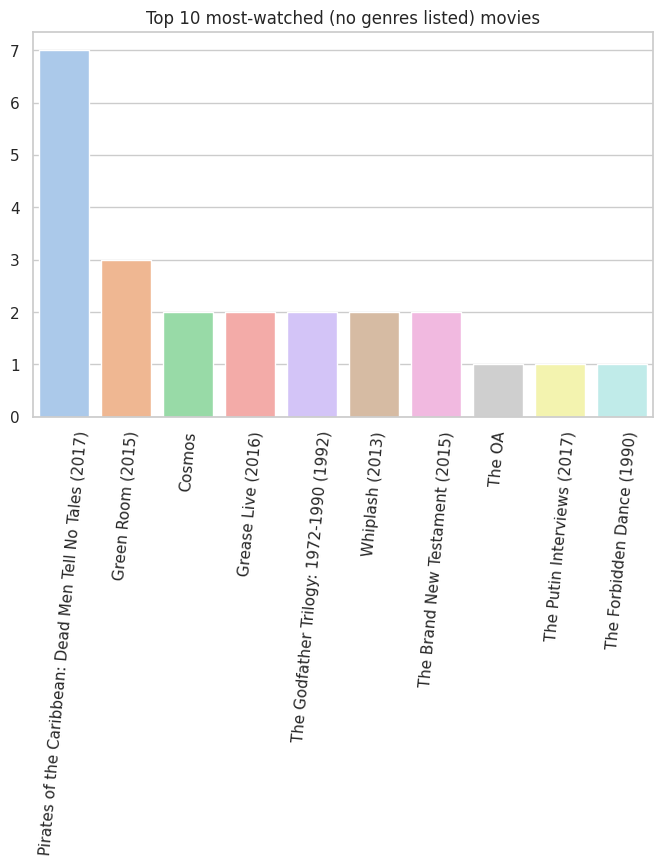

In [11]:
matrix=final_df.drop(['userId', 'rating', 'timestamp', 'user_score', 'movieId', 'language', 'Critic Reviews',
                      'Ratings','User Reviews'], axis=1)
for gen in matrix.columns[1:]:
  x=final_df[(final_df[gen]==True)]
  sns.set_theme(style='whitegrid')
  palette= sns.color_palette("pastel")
  plt.figure(figsize=(8,5))
  topmovies=x.groupby('title').size().sort_values(ascending=False).head(10)
  sns.barplot(x=topmovies.index, y=topmovies.values, palette=palette, hue=topmovies.index, legend=False)
  plt.title('Top 10 most-watched '+ gen+' movies')
  plt.xticks(rotation=85)
  plt.xlabel('')
  plt.show()

# Model 1: Collaborative filtering using KNN:



*   User Based



*   General
*   Genre Based


*   Item Based









# User Based

In [12]:
# Create a movie-user matrix based on ratings given by user
ratings=pd.merge(ratings,org_movies,how='inner',on='movieId')
movies_user_matrix=ratings.pivot_table(index='title',columns='userId',values='rating').fillna(0)
movies_user_matrix_copy=movies_user_matrix.copy()
movies_user_matrix

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eXistenZ (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0
xXx (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,2.0
xXx: State of the Union (2005),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5


In [13]:
# Initialize the NearestNeighbors model
knn= NearestNeighbors(metric='cosine',algorithm='brute')

# Function to predict unwatched movies similar to  user's rating for watched movies
def movie_recommender(user, num_neighbors, num_recommendation, original_df, copy, genre='general'):
  #Set the number of neighbors
  number_neighbors=num_neighbors
  knn.fit(original_df.values)

  # Find the nearest neighbors for each movie in the original data
  distances, indices =knn.kneighbors(original_df.values, n_neighbors=number_neighbors)

  # Get the index of user's column in the DataFrame
  user_index= original_df.columns.tolist().index(user)

  for movie_index, movie_title in enumerate(original_df.index):
    # Check is the user hasn't watched the movie
    if original_df.iloc[movie_index, user_index]==0:
      sim_movies = indices[movie_index].tolist()
      movie_distances = distances[movie_index].tolist()

      if movie_index in sim_movies:
        id_movie = sim_movies.index(movie_index)
        sim_movies.remove(movie_index)
        movie_distances.pop(id_movie)
      else:
        sim_movies = sim_movies[:num_neighbors-1]
        movie_distances = movie_distances[:num_neighbors-1]

      # Calculate movie similarity score based on cosine distances
      movie_similarity=[1-x for x in movie_distances]
      movie_similarity_copy=movie_similarity.copy()
      nominator=0

      # Calculated the predicted rating for the movie
      for sim_index in range(0,len(movie_similarity)):
        if original_df.iloc[sim_movies[sim_index], user_index] == 0:
          if len(movie_similarity_copy)==(number_neighbors-1):
            movie_similarity_copy.pop(sim_index)
          else:
            movie_similarity_copy.pop(sim_index- (len(movie_similarity)-len(movie_similarity_copy)))
        else:
          nominator=nominator + movie_similarity[sim_index]* original_df.iloc[sim_movies[sim_index], user_index]

      #Ensure there are movies in the similarity list

      if len(movie_similarity_copy) > 0:
        if sum(movie_similarity_copy) > 0:
          predicted_rating = nominator/ sum(movie_similarity_copy)
        else:
          predicted_rating = 0
      else:
        predicted_rating=0

      # Update the copy dataFrame with the predicted rating
      copy.iloc[movie_index, user_index] = predicted_rating

  # Print the list of movies the user has watched
  print('The list of the Movies User {} has watched in {}'.format(user, genre))
  cnt = 0
  for watched_movie in original_df[original_df[user] > 0][user].index.tolist():
    cnt += 1
    print(cnt, watched_movie)
  print('\n')

  recommended_movies = []

  # Iterate through movies the user has not watched
  for unwatched_movie in original_df[original_df[user]==0].index.tolist():
    index_original_df = original_df.index.tolist().index(unwatched_movie)
    predicted_rating = copy.iloc[index_original_df, copy.columns.tolist().index(user)]
    recommended_movies.append((unwatched_movie, predicted_rating))

  # Sort recommended movies by predicted rating
  sorted_rm = sorted(recommended_movies, key=lambda x: x[1], reverse=True)

  # Print the list of recommended movies
  print('The list of the Recommended Movies in', genre, '\n')
  rank = 1
  for recommended_movie in sorted_rm[:num_recommendation]:
    print('{}: {} - predicted rating:{}'.format(rank, recommended_movie[0], recommended_movie[1]))
    rank = rank + 1


In [14]:
# Example usage for general model
user_id = 250
num_of_recom = 10
movie_recommender(user_id, 10, num_of_recom, movies_user_matrix, movies_user_matrix_copy)

The list of the Movies User 250 has watched in general
1 101 Dalmatians (One Hundred and One Dalmatians) (1961)
2 Adventures of Priscilla, Queen of the Desert, The (1994)
3 Basic Instinct (1992)
4 Bowfinger (1999)
5 Brady Bunch Movie, The (1995)
6 Cocoon (1985)
7 Color Purple, The (1985)
8 Conspiracy Theory (1997)
9 Dead Poets Society (1989)
10 Deep Impact (1998)
11 Erin Brockovich (2000)
12 Fantasia (1940)
13 Fatal Attraction (1987)
14 Heathers (1989)
15 Hunchback of Notre Dame, The (1996)
16 Jane Eyre (1944)
17 Last of the Mohicans, The (1992)
18 Little Women (1933)
19 Mask (1985)
20 Misery (1990)
21 Monsters, Inc. (2001)
22 Shawshank Redemption, The (1994)
23 Sound of Music, The (1965)
24 Thelma & Louise (1991)
25 To Die For (1995)
26 Tomorrow Never Dies (1997)
27 Witness (1985)


The list of the Recommended Movies in general 

1: Come See the Paradise (1990) - predicted rating:5.000000000000001
2: Natural, The (1984) - predicted rating:5.000000000000001
3: Apollo 13 (1995) - predic

# Genre Based

In [ ]:
def recommendation_engine(userId, num_movies_genre, num_neighbors=10):
  for genre in genres:
    ratings_ = pd.merge(ratings[['userId', 'movieId', 'rating']], movies[movies[genre]==1][['movieId', 'title']], how='inner', on='movieId')

    if ratings_.empty:
      print(f"No movies found for genre: {genre}. Skipping...")
      continue
    df = ratings_.pivot_table(index='title', columns='userId', values='rating').fillna(0)
    df1=df.copy()
    if userId in df.columns:
      movie_recommender(userId,num_neighbors,num_movies_genre,df,df1,genre)
      print('\n\n')

In [ ]:
# Example usage for genre based model
user_id = 250
num_of_recom = 5
recommendation_engine(user_id, num_of_recom)

The list of the Movies User 250 has watched in Action
1 Last of the Mohicans, The (1992)
2 Tomorrow Never Dies (1997)


The list of the Recommended Movies in Action 

1: Rob Roy (1995) - predicted rating:4.5
2: Sneakers (1992) - predicted rating:4.5
3: Goldfinger (1964) - predicted rating:3.0
4: Lethal Weapon 4 (1998) - predicted rating:3.0
5: Mask of Zorro, The (1998) - predicted rating:3.0



The list of the Movies User 250 has watched in Adventure
1 101 Dalmatians (One Hundred and One Dalmatians) (1961)
2 Monsters, Inc. (2001)
3 Thelma & Louise (1991)
4 Tomorrow Never Dies (1997)


The list of the Recommended Movies in Adventure 

1: Babe: Pig in the City (1998) - predicted rating:5.0
2: Easy Rider (1969) - predicted rating:5.0
3: Mosquito Coast, The (1986) - predicted rating:5.0
4: 101 Dalmatians (1996) - predicted rating:4.0
5: Finding Nemo (2003) - predicted rating:4.0



The list of the Movies User 250 has watched in Animation
1 101 Dalmatians (One Hundred and One Dalmatians) (1

# Item Based

In [15]:
# Create a movie - user matrix based on ratings given by user
item_dataset= ratings.pivot(index='movieId',columns='userId',values='rating')
item_dataset.head()
item_dataset.fillna(0,inplace=True)
item_dataset.head()
item_dataset

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
num_user_voted = ratings.groupby('movieId')['rating'].agg('count')
num_movies_voted = ratings.groupby('userId')['rating'].agg('count')
num_user_voted
# num_movies_voted

,rating
movieId,
1,215
2,110
3,52
4,7
5,49
...,...
193581,1
193583,1
193585,1


In [ ]:
user_score = 0
movie_score = 0
item_dataset = item_dataset.loc[num_user_voted[num_user_voted > movie_score].index,:]
item_dataset = item_dataset.loc[:,num_movies_voted[num_movies_voted > user_score].index]
item_dataset

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
csr_data=csr_matrix(item_dataset.values)
item_dataset.reset_index(inplace=True)

In [ ]:
knn=NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [ ]:
def item_recommender_engine(movie_name, num_recomm):
  n_movies_to_recommend = num_recomm

  # Filter movies that contain the given movie name
  movie_list = movies[movies['title'].str.contains(movie_name)]
  if len(movie_list):
    movie_idx = movie_list.iloc[0]['movieId']
    movie_idx = item_dataset[item_dataset['movieId'] == movie_idx].index[0]

    # Get nearest neighbors and distances
    distances, indices = knn.kneighbors(csr_data[movie_idx], n_neighbors=n_movies_to_recommend+1)

    # Sorting by distances
    rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])

    recommend_frame = []
    for val in rec_movie_indices:
      movie_idx = item_dataset.iloc[val[0]]['movieId']
      idx = movies[movies['movieId'] == movie_idx].index
      recommend_frame.append({'Title': movies.iloc[idx]['title'].values[0], 'Distance':val[1]})

    df=pd.DataFrame(recommend_frame, index=range(1, n_movies_to_recommend + 2))
    return df
  else:
    return "No movies found. Please input another movie name"

In [ ]:
# Example of Item based Recommendation
num_recomm = 10
item_recommender_engine('Felon', num_recomm)

,Title,Distance
1,Felon (2008),0.000000
2,I.O.U.S.A. (a.k.a. IOUSA) (2008),0.200000
3,Martin Lawrence Live: Runteldat (2002),0.200000
4,Little Dieter Needs to Fly (1997),0.200000
5,Breakin' All the Rules (2004),0.200000
6,Something New (2006),0.200000
7,The Players Club (1998),0.200000
8,Sugar Hill (1994),0.230781
9,Cocaine Cowboys (2006),0.375305
10,Black Book (Zwartboek) (2006),0.400000


# Model 2: Collaborative Filtering Using PCA

## Item Based

In [16]:
rating_data = pd.io.parsers.read_csv('/content/ratings.csv')
movie_data = pd.io.parsers.read_csv('/content/movies.csv')

In [17]:
pca_dataset = item_dataset

In [18]:
final_Data = pd.merge(pca_dataset, movie_data, how='inner', on='movieId')
final_movie_data = final_Data
for i in range(1,611):
  final_movie_data = final_movie_data.drop([i], axis=1)

In [19]:
final_movie_data['movie_Id'] = final_movie_data.index
movie_data = final_movie_data
movie_data

,movieId,title,genres,movie_Id
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1
2,3,Grumpier Old Men (1995),Comedy|Romance,2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3
4,5,Father of the Bride Part II (1995),Comedy,4
...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,9719
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,9720
9721,193585,Flint (2017),Drama,9721
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,9722


In [20]:
arr = np.arange(movie_data.shape[0])
pca_dataset.index = arr
ratings_mat = pca_dataset.to_numpy()

In [26]:
normalised_mat = ratings_mat - np.matrix(np.mean(ratings_mat, 1)).T
cov_mat = np.cov(normalised_mat)
evals, evecs = np.linalg.eig(cov_mat)

In [27]:
def top_cosine_similarity(data, movie_id, top_n=10):
  index = movie_id
  movie_row = data[index, :]
  magnitude = np.sqrt(np.einsum('ij, ij -> i', data, data))
  similarity=np.dot(movie_row, data.T) / (magnitude[index] * magnitude)
  sort_indexes = np.argsort(-similarity)
  return sort_indexes[:top_n]

# Helping function to print top N similar movies
def print_similar_movies(movie_data, movie_id, top_indexes):
  print('Recommendations for {0}: \n'.format(
  movie_data[movie_data.movie_Id == movie_id].title.values[0]))
  for id in top_indexes:
    print(movie_data[movie_data.movie_Id == id].title.values[0])


In [28]:
# Example usage for Item based filtering
k = 50
movie_id = 18
top_n = 10
sliced_pca=evecs[:, :k]
top_indexes = top_cosine_similarity(sliced_pca, movie_id, top_n)
print_similar_movies(movie_data, movie_id, top_indexes)

Recommendations for Ace Ventura: When Nature Calls (1995): 

Ace Ventura: When Nature Calls (1995)
Ace Ventura: Pet Detective (1994)
Jerky Boys, The (1995)
Dumb & Dumber (Dumb and Dumber) (1994)
Nine Months (1995)
Happy Gilmore (1996)
Beverly Hills Cop III (1994)
Tommy Boy (1995)
Indian in the Cupboard, The (1995)
Congo (1995)


# User Based

In [21]:
movie_id_to_gen = pd.DataFrame(index=movie_data['movieId'])
for id in movie_id_to_gen.index:
  col_val = movie_data.loc[movie_data['movieId'] == id, 'genres'].values[0]
  movie_id_to_gen.at[id, 'genre'] = random.choice(col_val.split('|'))

movie_id_to_gen

,genre
movieId,
1,Comedy
2,Adventure
3,Comedy
4,Romance
5,Comedy
...,...
193581,Fantasy
193583,Comedy
193585,Drama


In [22]:
def top_cosine_similarity_(data, movie_id, top_n=10):
    index = movie_id # Movie id starts from 0
    movie_row = data[index, :]
    magnitude = np.sqrt(np.einsum('ij, ij -> i', data, data))
    similarity = np.dot(movie_row, data.T) / (magnitude[index] * magnitude)
    sort_indexes = np.argsort(-similarity)
    return sort_indexes[:top_n]

# Helper function to return top N similar movies
def similar_movies(movie_data, movie_id, top_indexes):
    rec = []
    ids = []
    for id in top_indexes:
      rec.append(movie_data[movie_data.movie_Id == movie_id].title.values[0])
      ids.append(movie_data[movie_data.movie_Id == movie_id].movieId.values[0])
    return rec , ids

In [25]:
def user_rec_engine(user_id, no_of_rec, gen_wise, sliced):
  filt_pca_dataset = pca_dataset[pca_dataset[user_id]>0]
  sorted_pca_dataset = filt_pca_dataset.sort_values(by=user_id, ascending=False)
  print('Recommendations for user {0}: \n'.format(user_id))
  gen_wise_rec = {gen: set() for gen in genres}

  recommendations = set()

  for i in sorted_pca_dataset.index:
    top_indexes = top_cosine_similarity(sliced, i ,no_of_rec)
    top_indexes = np.squeeze(np.array(top_indexes))
    rec, ids = similar_movies(movie_data, i, top_indexes)
    if(gen_wise):
      for ind in range(len(ids)):
        id=ids[ind]
        if(movie_id_to_gen.loc[id,'genre'] == 'IMAX'):
          continue
        if len(gen_wise_rec[movie_id_to_gen.loc[id,'genre']]) < no_of_rec:
            gen_wise_rec[movie_id_to_gen.loc[id,'genre']].add(rec[ind])
    else:
      for movie in rec:
        if len(recommendations) < no_of_rec and movie not in recommendations:
          print(movie)
          recommendations.add(movie)
        else:
          break

  if(gen_wise):
    for gen in gen_wise_rec:
      print('Recommendations for ',format(gen),' :')
      for movie in gen_wise_rec[gen]:
        print(movie)
      print()


In [31]:
# Example Usage for User based recommendation
user_id = 250
no_of_rec = 10
genwise = 0 # Toggle on for genre wise recommendation
user_rec_engine(user_id, no_of_rec, genwise, sliced_pca)

Recommendations for user 250: 

Color Purple, The (1985)
Shawshank Redemption, The (1994)
Adventures of Priscilla, Queen of the Desert, The (1994)
Jane Eyre (1944)
Little Women (1933)
Sound of Music, The (1965)
Dead Poets Society (1989)
Fantasia (1940)
Fatal Attraction (1987)
Erin Brockovich (2000)


# Model 3 : Collaborative filtering using SVD

## Item Based

In [32]:
A=normalised_mat.T / np.sqrt(ratings_mat.shape[0] - 1)
U, S, V=np.linalg.svd(A)

In [33]:
# Example usage for item based filtering
k=50
movie_id = 18
top_n = 10
sliced_svd = V.T[:, :k]
indexes = top_cosine_similarity(sliced_svd, movie_id, top_n)
indexes = np.squeeze(np.array(indexes))
print_similar_movies(movie_data, movie_id, indexes[:top_n])

Recommendations for Ace Ventura: When Nature Calls (1995): 

Ace Ventura: When Nature Calls (1995)
Ace Ventura: Pet Detective (1994)
Jerky Boys, The (1995)
Dumb & Dumber (Dumb and Dumber) (1994)
Nine Months (1995)
Happy Gilmore (1996)
Beverly Hills Cop III (1994)
Tommy Boy (1995)
Indian in the Cupboard, The (1995)
Congo (1995)


## User based

In [34]:
# Example usage for user based filtering
user_id = 250
no_of_rec= 10
genwise=0 #Toggle on for genre wise recommendation
user_rec_engine(user_id, no_of_rec, genwise, sliced_svd)

Recommendations for user 250: 

Color Purple, The (1985)
Shawshank Redemption, The (1994)
Adventures of Priscilla, Queen of the Desert, The (1994)
Jane Eyre (1944)
Little Women (1933)
Sound of Music, The (1965)
Dead Poets Society (1989)
Fantasia (1940)
Fatal Attraction (1987)
Erin Brockovich (2000)


# Hybrid Model

In [35]:
# Creating the h_model_data
ratings_=pd.merge(ratings, org_movies, how='inner', on='movieId')
h_model_data=ratings_.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)
h_model_data_copy=h_model_data.copy()
h_model_data['userId']=h_model_data.index
x=h_model_data.values

# Apply Kmeans clustering
kmeans= KMeans(n_clusters=7, init='k-means++', random_state=37, n_init=20).fit(x[:,:9724])

# Get the cluster labels
list1=kmeans.labels_

In [36]:
new_df=ratings_.pivot_table(index='movieId', columns='userId',values='rating').fillna(0)

In [37]:
def hybrid_engine(userId, no_of_movies):
    # Get the cluster for the given userId
    cluster = list1[userId - 1]

    # Find similar users based on the cluster
    similar_users = []
    for i in range(1, len(list1) + 1):
        if list1[i - 1] == cluster:
            similar_users.append(i)

    movieid_wr = pd.DataFrame(columns=['movieId', 'wr'])

    # Calculate weighted ratings for movies
    for index, row in new_df.iterrows():
        wr = 0
        cnt = 0
        for i in similar_users:
            if row[i] > 0:
                wr += row[i]
                cnt += 1
        if cnt == 0:
            continue
        wr /= cnt
        wr *= 2
        wr = round(wr)
        wr /= 2
        data_to_add = [{'movieId': index, 'wr': wr}]
        new_rows_df = pd.DataFrame(data_to_add)
        if not new_rows_df.empty:
          movieid_wr = pd.concat([movieid_wr, new_rows_df], ignore_index=True)
          merged_df1 = pd.merge(movieid_wr, merged_df, how='inner', on='movieId')

    # Prepare features (X) and target (y)
    X = merged_df1.drop(['movieId', 'wr', 'title', 'language'], axis=1)
    X = pd.get_dummies(X)
    y = merged_df1['wr']

    # Create a Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

    # training data
    rf_model.fit(X, y)

    # features for predicting ratings for new movies
    new_X = merged_df.drop(['movieId', 'title', 'language'], axis=1)
    new_X = pd.get_dummies(new_X)

    # Predicted rating
    pred_wr = rf_model.predict(new_X)

    np_df = pd.DataFrame(pred_wr, columns=['pred_wr'])
    selected_movies = pd.concat([np_df, merged_df['movieId']], axis=1)
    sorted_df = selected_movies.sort_values(by='pred_wr', ascending=False)

    print('Recommendations for user {0}: \n'.format(userId))

    # Print recommended movies that the user hasn't rated
    cnt = 0
    for i in sorted_df['movieId']:
        if new_df.loc[i, userId] == 0:
            cnt += 1
            movie_row = merged_df[(merged_df['movieId'] == i)]
            print(movie_row['title'].values[0] , ' - predicated_rating:' , sorted_df.loc[sorted_df['movieId'] == i , 'pred_wr'].values[0] )
        if cnt > no_of_movies:
            break


In [38]:
user_id = 250
no_of_rec= 10
hybrid_engine(user_id,no_of_rec)

<ipython-input-37-849c273b804e>:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  movieid_wr = pd.concat([movieid_wr, new_rows_df], ignore_index=True)


Recommendations for user 250: 

Scooby-Doo Goes Hollywood (1979)  - predicated_rating: 4.9
Trinity and Sartana Are Coming (1972)  - predicated_rating: 4.84
National Lampoon's Bag Boy (2007)  - predicated_rating: 4.84
Ice Age: The Great Egg-Scapade (2016)  - predicated_rating: 4.83
Story of Women (Affaire de femmes, Une) (1988)  - predicated_rating: 4.825
Scooby-Doo! and the Samurai Sword (2009)  - predicated_rating: 4.825
Big Sleep, The (1946)  - predicated_rating: 4.815
Willy/Milly (1986)  - predicated_rating: 4.815
Scooby-Doo! and the Loch Ness Monster (2004)  - predicated_rating: 4.81
Diabolique (Les diaboliques) (1955)  - predicated_rating: 4.81
Tom and Jerry: Shiver Me Whiskers (2006)  - predicated_rating: 4.8
